In [1]:
from __future__ import annotations
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

pd.options.display.float_format = "{:,.3f}".format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

In [2]:
# load to dataframe
INFILE = '/home/grace/work/SEER/data/SEERPLUS_2010_2020.clean.tsv'
master = pd.read_csv(INFILE, header=0, sep='\t', na_values='.')
master.head()

,patient_id,patient_death_year,diagnosis_year,followup_year,diagnosis_agebin,cancer_type,cancer_group,primary_type,primary_group,t_stage_ajcc,n_stage_ajcc,g_stage_ajcc,t_stage_src,n_stage_src,g_stage_src,grade,grade_src,regional_nodes,regional_nodes_examined,regional_nodes_positive,behavior,num_malignant_tumors,num_benign_tumors,psa,breast_subtype,hist_type,hist_cateogry,brain_met,bone_met,lung_met,liver_met,other_met,distant_ln
0,108,NaN,2015,2020,75-79 years,Vulva,Vulva,Vulva,Vulva,Tis,N0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,BENIGN,2,0,NaN,NaN,8542,8500-8549: ductal and lobular neoplasms,False,False,False,False,NaN,NaN
1,137,"2,017.000",2012,2017,85-89 years,Myeloma,Leukemia,Myeloma,Leukemia,NaN,NaN,NaN,NaN,NaN,NaN,T_CELL,NaN,NaN,NaN,NaN,MALIGNANT,2,0,NaN,NaN,9732,9730-9739: plasma cell tumors,NaN,NaN,NaN,NaN,NaN,NaN
2,139,"2,011.000",2003,2011,60-64 years,NHL - Extranodal,Non-Hodgkin Lymphoma,Lung and Bronchus,Lung and Bronchus,NaN,NaN,NaN,NaN,NaN,NaN,T_CELL,NaN,NaN,NaN,NaN,MALIGNANT,3,0,NaN,NaN,9699,9670-9699: nhl - mature b-cell lymphomas,NaN,NaN,NaN,NaN,NaN,NaN
3,139,"2,011.000",2007,2011,65-69 years,Breast,Breast,Breast,Breast,Tis,N0,0,NaN,NaN,NaN,G3,NaN,NaN,0.000,NaN,BENIGN,3,0,NaN,NaN,8010,"8010-8049: epithelial neoplasms, NOS",NaN,NaN,NaN,NaN,NaN,NaN
4,139,"2,011.000",2010,2011,70-74 years,Breast,Breast,Breast,Breast,T3,N0,IIB,NaN,NaN,NaN,G3,NaN,NEG,3.000,0.000,MALIGNANT,3,0,NaN,HR-/HER2-,8500,8500-8549: ductal and lobular neoplasms,False,False,False,False,NaN,NaN


In [3]:
from util_funcs import do_basic_formatting
from util_funcs import do_basic_filtering
from util_funcs import remove_identical_primary_secondary_cases

print('\nFiltering')
maintable = do_basic_filtering(master.copy(), filter_mets='brain')
maintable = remove_identical_primary_secondary_cases(maintable)

print('\nFormatting')
maintable = do_basic_formatting(maintable)
maintable.head()


Filtering
Reginning records: 5604583
Removing records not in range (2010, 2020)... removed 371509 records
Removing records with non 'MALIGNANT' behavior... removed 632160 records
Handling patients with multiple records of same cancer_type... removed 82397 records
Removing records where brain_met value is missing
- removed 695869 records

Final records: 3822648, patients: 3620282
Removing MET records where primary tissue is identical to secondary tissue
- removed 67488 records

Formatting
Missing 0 codes.
Formatting cancer subtypes
TNG, Grade standardisation


,patient_id,patient_death_year,diagnosis_year,followup_year,diagnosis_agebin,cancer_type,cancer_group,primary_type,primary_group,t_stage_ajcc,n_stage_ajcc,g_stage_ajcc,t_stage_src,n_stage_src,g_stage_src,grade,grade_src,regional_nodes,regional_nodes_examined,regional_nodes_positive,behavior,num_malignant_tumors,num_benign_tumors,psa,breast_subtype,hist_type,hist_cateogry,brain_met,bone_met,lung_met,liver_met,other_met,distant_ln,any_met,hist_group,hist_type_descr,TSTAGE_STD,NSTAGE_STD,GSTAGE_STD,GRADE_STD
4,139,"2,011.000",2010,2011,70-74 years,Breast,Breast,Breast,Breast,T3,N0,IIB,NaN,NaN,NaN,G3,NaN,NEG,3.000,0.000,MALIGNANT,3,0,NaN,HR-/HER2-,8500,ductal and lobular neoplasms,NO,NO,NO,NO,NaN,NaN,NO,ductal and lobular neoplasms,Infiltrating duct carcinoma [+ others],T3,N0,II,G3
5,142,NaN,2018,2020,70-74 years,Breast,Breast,Breast,Breast,T2,N0,IIA,NaN,NaN,NaN,G3,P,NEG,3.000,0.000,MALIGNANT,2,0,NaN,HR-/HER2-,8500,ductal and lobular neoplasms,NO,NO,NO,NO,NO,False,NO,ductal and lobular neoplasms,Infiltrating duct carcinoma [+ others],T2,N0,II,G3
6,194,NaN,2016,2020,55-59 years,Ovary,Ovary,Ovary,Ovary,T1c,N0,IC,P,P,NaN,G2,NaN,NEG,10.000,0.000,MALIGNANT,2,0,NaN,NaN,8441,"cystic, mucinous and serous neoplasms",NO,NO,NO,NO,NO,False,NO,"cystic, mucinous and serous neoplasms",Serous carcinoma [+ others],T1,N0,I,G2
7,220,NaN,2011,2020,70-74 years,Prostate,Prostate,Prostate,Prostate,T1c,N0,II,NaN,NaN,NaN,G2,NaN,NaN,0.000,NaN,MALIGNANT,2,0,6.600,NaN,8140,adenomas and adenocarcinomas,NO,NO,NO,NO,NaN,NaN,NO,adenomas and adenocarcinomas,Adenoma [+ others],T1,N0,II,G2
8,265,"2,016.000",2011,2016,65-69 years,Prostate,Prostate,Prostate,Prostate,T2c,N0,II,NaN,NaN,NaN,G3,NaN,NaN,0.000,NaN,MALIGNANT,2,0,7.700,NaN,8140,adenomas and adenocarcinomas,NO,NO,NO,NO,NaN,NaN,NO,adenomas and adenocarcinomas,Adenoma [+ others],T2,N0,II,G3


PREVALENCE

In [4]:
### PREVALENCE ###
# calculate prevalences per cancer_group.
# brain case load, plus brain/bone/lung/liver met rates

# from util_funcs import calculate_logodds
from util_funcs import calculate_prevalence
from util_funcs import calculate_relrisk
from util_funcs import select_valid

# FEATURE = 'cancer_group:hist_group'
# maintable[FEATURE] = maintable['cancer_group'] + ':' + maintable['hist_group']
FEATURE = 'cancer_group'
MIN_RECORDS = 5000
SEC_FEATURES = {'brain_met'}
SEC_MINCOUNT = 100
VALID_FEATURES = select_valid(maintable, feature=FEATURE, min_records=MIN_RECORDS, sec_features=SEC_FEATURES, sec_mincount=SEC_MINCOUNT)

# otable = calculate_logodds(feature=FEATURE, valid=VALID_FEATURES, response='brain_met', table=maintable)
ptable = calculate_prevalence(FEATURE, VALID_FEATURES, 'brain_met', maintable)
rtable = calculate_relrisk(FEATURE, VALID_FEATURES, 'brain_met', maintable)
mtable = calculate_relrisk(FEATURE, VALID_FEATURES, 'brain_met', maintable[maintable['any_met']=='YES'])


In [5]:
assert set(ptable.index) == set(rtable.index)
assert set(rtable.index) == set(mtable.index)
stat_frame = ptable.copy()
stat_frame['relRisk'] = mtable['relRisk']
stat_frame['relRiskLow'] = mtable['relRiskLow']
stat_frame['relRiskHigh'] = mtable['relRiskHigh']
stat_frame = stat_frame.sort_values('YES', ascending=False).head(20)
stat_frame = stat_frame.reset_index()
print(stat_frame)

                   cancer_group      NO    YES  records  prevalence (%)  relRisk  relRiskLow  relRiskHigh
0             Lung and Bronchus  368337  44748   413085          10.833   37.376      34.272       40.761
1                          Skin  228404   2993   231397           1.293   42.989      39.262       47.071
2                        Breast  648873   2769   651642           0.425    9.043       8.236        9.928
3       Kidney and Renal Pelvis  155081   2277   157358           1.447   12.123      11.028       13.327
4                    Colorectal  359879   1065   360944           0.295    1.743       1.569        1.936
5                     Esophagus   39266    747    40013           1.867    7.503       6.717        8.380
6                      Pancreas  119106    510   119616           0.426    1.000       0.885        1.130
7                      Prostate  536647    459   537106           0.085    1.368       1.207        1.550
8                       Stomach   65948    440

load_group


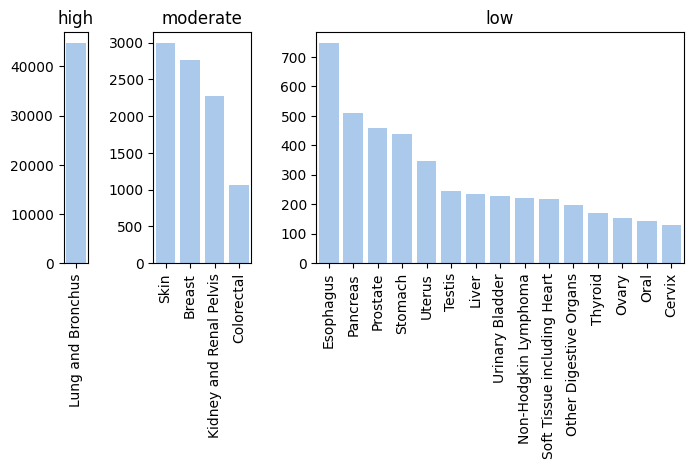

prevalence_group


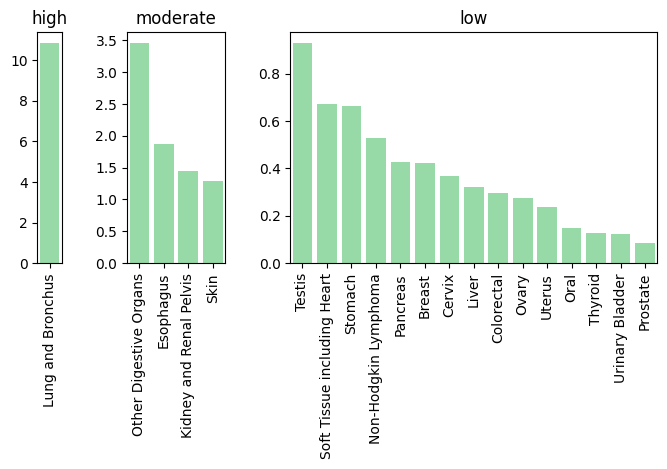

tendency_group


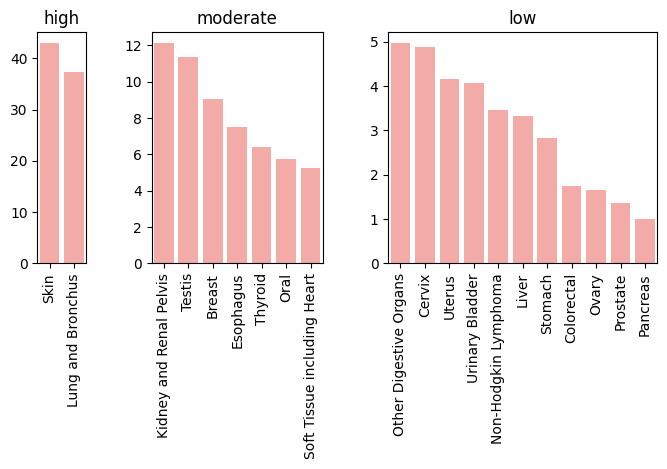

In [6]:
import matplotlib as mpl
cmap = mpl.colormaps['tab20']

def assign_load_cat(load: int) -> str:
    if load >= 10_000:
        return 'high'
    elif load >= 1_000:
        return 'moderate'
    else:
        return 'low'

def assign_prevalence_cat(prev: float) -> str:
    if prev >= 10:
        return 'high'
    elif prev >= 1:
        return 'moderate'
    else:
        return 'low'

def assign_tendency_cat(pref: float) -> str:
    if pref >= 20:
        return 'high'
    elif pref >= 5:
        return 'moderate'
    else:
        return 'low'


palette = {feat: cmap(i) for i, feat in enumerate(sorted(list(stat_frame[FEATURE].unique())))}

stat_frame['load_group'] = stat_frame['YES'].apply(assign_load_cat)
stat_frame['prevalence_group'] = stat_frame['prevalence (%)'].apply(assign_prevalence_cat)
stat_frame['tendency_group'] = stat_frame['relRisk'].apply(assign_tendency_cat)

strats = ['load_group', 'prevalence_group', 'tendency_group']
values = ['YES', 'prevalence (%)', 'relRisk']
colors = ['b', 'g', 'r']
sns.set_color_codes("pastel")
for strat, value, color in zip(strats, values, colors):
    print(strat)
    fig, axes = plt.subplots(
        nrows=1, ncols=3, figsize=(8, 3), sharey=False, 
        width_ratios=[
            stat_frame[stat_frame[strat]=='high'].shape[0],
            stat_frame[stat_frame[strat]=='moderate'].shape[0],
            stat_frame[stat_frame[strat]=='low'].shape[0],
        ]
    )

    stat_frame = stat_frame.sort_values(value, ascending=False)
    for ax, group in zip(axes, ['high', 'moderate', 'low']):
        df = stat_frame[stat_frame[strat]==group]
        # sns.barplot(data=df, x=FEATURE, y=value, color=color, hue=FEATURE, palette=palette, ax=ax)
        # sns.barplot(data=df, x=FEATURE, y=value, color=color, hue=FEATURE, ax=ax)
        sns.barplot(data=df, x=FEATURE, y=value, color=color, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.set_ylabel('')
        ax.set_xlabel('')
        ax.set_title(group)

    # plt.tight_layout()
    plt.title(group)
    plt.subplots_adjust(wspace=0.4)
    plt.show()
    plt.close()

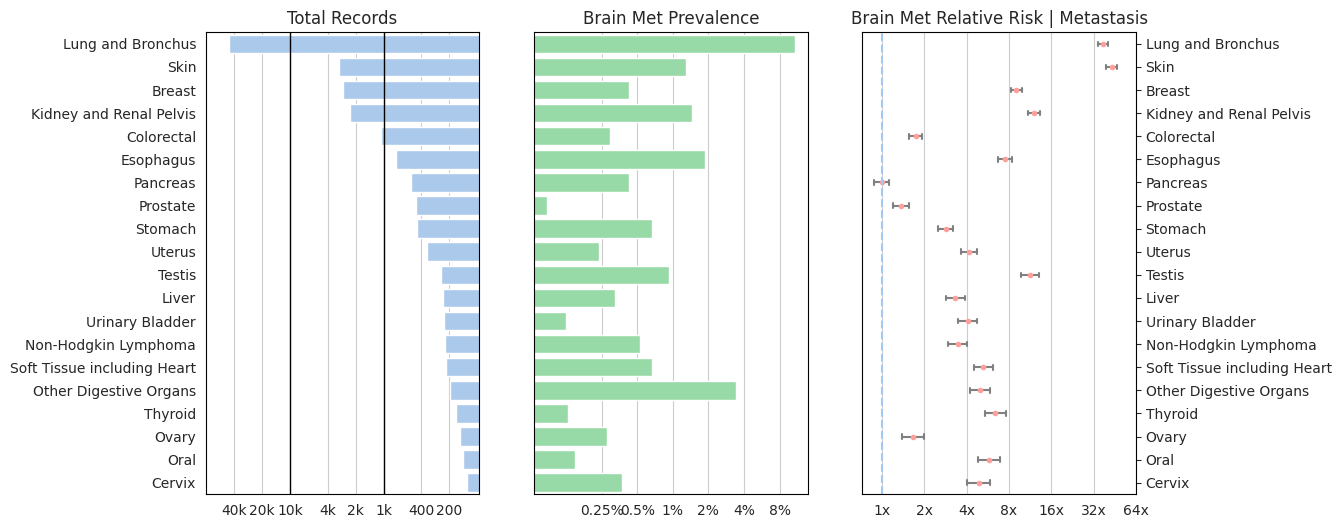

In [7]:

# Initialize the matplotlib figure
# sns.set_theme(style="whitegrid")
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 16), width_ratios=[3, 2, 3], sharey=True)
# ax1 = axes[0]
# ax2 = axes[1]
# ax3 = axes[2]

stat_frame = stat_frame.sort_values('YES', ascending=False)
sns.set_color_codes("pastel")

fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 3)

### Cases Subplot ###
with sns.axes_style("whitegrid"):
    ax1 = fig.add_subplot(gs[0])
    # sns.barplot(data=stat_frame, x="records", y=FEATURE, color="b", ax=ax1)
    sns.barplot(data=stat_frame, x="YES", y=FEATURE, color="b", ax=ax1)

### Prevalence Subplot ###
with sns.axes_style("whitegrid"):
    ax2 = fig.add_subplot(gs[1], sharey=ax1)
    sns.barplot(data=stat_frame, x="prevalence (%)", y=FEATURE, color="g", ax=ax2, legend=False)

### Odds Ratio Subplot ###
with sns.axes_style("whitegrid"):
    ax3 = fig.add_subplot(gs[2], sharey=ax1)

    def plot_ci(y: int, low: float, high: float, ax) -> None:
        height = 0.2
        color = 'grey'
        cap_top = y + height / 2
        cap_bot = y - height / 2
        ax.plot([low, high], [y, y], color=color)
        ax.plot([low, low], [cap_bot, cap_top], color=color)
        ax.plot([high, high], [cap_bot, cap_top], color=color)

    for i, row in stat_frame.iterrows():
        plot_ci(y=i, low=row['relRiskLow'], high=row['relRiskHigh'], ax=ax3)
    
    sns.pointplot(
        data=stat_frame, x="relRisk", y=FEATURE,  errorbar=None, 
        linestyle="none", marker="o", ax=ax3, legend=False, capsize=.4,
        color='r', markersize=2, 
    )

ax3.axvline(1, c='b', ls='--')
ax3.set_xscale('log')

### Aesthetics ###
ax1.set_title('Total Records')
ax2.set_title('Brain Met Prevalence')
ax3.set_title('Brain Met Relative Risk | Metastasis')

# ax1
# xticks1 = [300_000, 600_000, 900_000, 1_200_000, 1_500_000]
# xlabels1 = [f"{x//1000}k" if x <1_000_000 else f"{x/1_000_000:.1f}m" for x in xticks1]
# xticks1 = [250, 500, 1_000, 2_000, 4_000, 8_000, 16_000, 32_000]
xticks1 = [200, 400, 1_000, 2_000, 4_000, 10_000, 20_000, 40_000]
xlabels1 = [f"{x//1000}k" if x >= 1000 else str(x) for x in xticks1]
ax1.set_xscale('log')
ax1.set_xlim(0, 80_000)
ax1.axvline(1_000, color='black', lw=1)
ax1.axvline(10_000, color='black', lw=1)
ax1.set_xticks(xticks1, xlabels1)
ax1.invert_xaxis()

# ax2
# xticks2 = [2, 4, 6, 8, 10]
xticks2 = [0.25, 0.5, 1, 2, 4, 8]
xlabels2 = [f"{x}%" for x in xticks2]
ax2.set_xscale('log')
ax2.set_xticks(xticks2, xlabels2)
plt.setp(ax2.get_yticklabels(), visible=False)
# ax2.set_xlim(0, xticks2[-1]+0.1)
# ax2.set_xlim(0, 6)
# ax2.set_yticks([], [])

# ax3
xticks3 = [1, 2, 4, 8, 16, 32, 64]
xlabels3 = [f"{x}x" for x in xticks3]
ax3.set_xticks(xticks3, xlabels3)
ax3.yaxis.tick_right()
# plt.setp(ax3.get_yticklabels(), )
# ax2.set_yticks([], [])

# all axes
for ax in [ax1, ax2, ax3]:
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    # sns.despine(left=True, bottom=True, ax=ax)

# moving odds plot
# box = ax3.get_position()
# box.x0 = box.x0 - 0.02
# box.x1 = box.x1 - 0.02
# ax3.set_position(box)

plt.show()
plt.close()